### 주제 : 빅뱅이론 데이터 수집 및 분석

1. 빅뱅이론을 검색하여 각 회차의 평점, 해당 시즌, 상영일자를 조회하여 데이터를 분석하자

- 모듈 import

In [88]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
import matplotlib.pyplot as plt

import time

- url 열기

In [59]:
options = webdriver.ChromeOptions()

prefs = {'download.default_directory' : "/home/min/dev_ws/EDA/data/task/",
         'download.prompt_for_download':False}
options.add_experimental_option('prefs',prefs)

In [60]:

url = "https://www.imdb.com/"

driver= webdriver.Chrome(service=Service("/home/min/dev_ws/EDA/driver/chromedriver"),
                         options=options)
driver.get(url)

- 검색창에 bigbang theory 검색

In [61]:
search_btn = driver.find_element(By.ID, "suggestion-search")
search_btn.send_keys('the big bang theory')

In [62]:
search_btn.send_keys(Keys.ENTER)

- Title 선택 bigbang theory

In [63]:
driver.find_element(By.XPATH, './/a[contains(@href, "title/tt0898266/?ref_=fn_al_tt_1")]').click()



- 에피소드 정보 선택

In [65]:
driver.find_element(By.XPATH, './/a[contains(@href, "/title/tt0898266/episodes?ref_=tt_eps_sm")]').click()


- 시즌 선택

In [66]:
for season in range(1,13):  # 총 12시즌
    driver.find_element(By.XPATH, f'.//a[contains(@href, "/title/tt0898266/episodes/?season={season}")]').click()

    time.sleep(1)

- 시즌 별 평점, 상영 날짜 불러오기

In [67]:
#season 1
driver.find_element(By.XPATH, './/a[contains(@href, "/title/tt0898266/episodes/?season=1")]').click()

- BeautifulSoup 사용

In [68]:
html = driver.page_source
soup = BeautifulSoup(html,"html.parser")

soup

<html class="scriptsOn" lang="en-US" style="--ipt-focus-outline-on-base: none; --ipt-focus-outline-on-baseAlt: none;" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/"><head><script async="" crossorigin="anonymous" src="https://images-na.ssl-images-amazon.com/images/I/31bJewCvY-L.js"></script><meta charset="utf-8"/><meta content="width=device-width" name="viewport"/><script>if(typeof uet === 'function'){ uet('bb', 'LoadTitle', {wb: 1}); }</script><title>The Big Bang Theory (TV Series 2007–2019) - Episode list - IMDb</title><meta content="The Big Bang Theory (TV Series 2007–2019) - Movies, TV, Celebs, and more..." data-id="main" name="description"/><meta content="Episodes" name="keywords"/><meta content="IMDb" property="og:site_name"/><meta content="The Big Bang Theory (TV Series 2007–2019) - Episode list - IMDb" property="og:title"/><meta content="The Big Bang Theory (TV Series 2007–2019) - Movies, TV, Celebs, and more..." property="og:descrip

In [69]:
rating = soup.find_all(class_="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating")
len(rating),rating

# rating_value = rating.find("span","aria-label")

(19,
 [<span aria-label="IMDb rating: 9.5" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg class="ipc-icon ipc-icon--star-inline" fill="currentColor" height="24" role="presentation" viewbox="0 0 24 24" width="24" xmlns="http://www.w3.org/2000/svg"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg>9.5<span class="ipc-rating-star--maxRating">/10</span></span>,
  <span aria-label="IMDb rating: 9.1" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg class="ipc-icon ipc-icon--star-inline" fill="currentColor" height="24" role="presentation" viewbox="0 0 24 24" width="24" xmlns="htt

 !회차는 총17 회차이지만 top rated 까지 검색되었기 때문에 상단 두개는 필요없는 데이터이다  
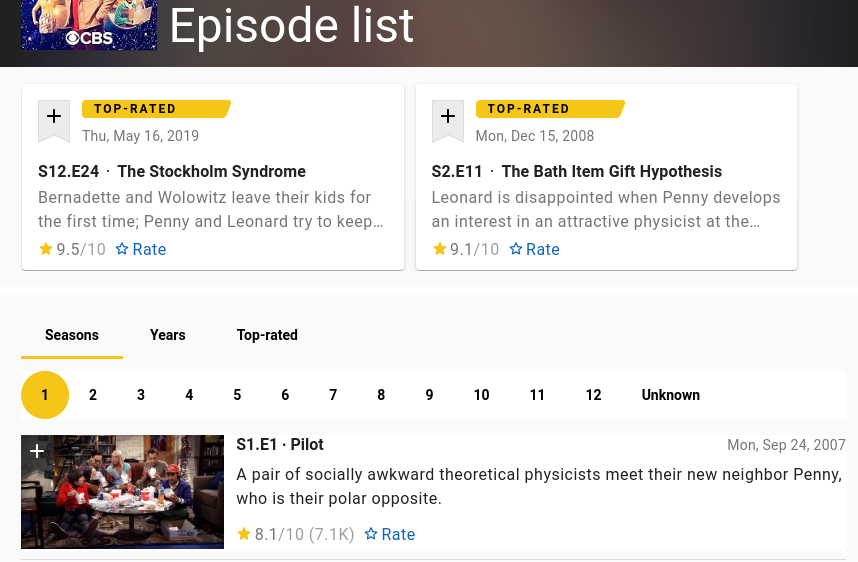

In [70]:
rating=rating[2:]
len(rating), rating

(17,
 [<span aria-label="IMDb rating: 8.1" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg class="ipc-icon ipc-icon--star-inline" fill="currentColor" height="24" role="presentation" viewbox="0 0 24 24" width="24" xmlns="http://www.w3.org/2000/svg"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg>8.1<span class="ipc-rating-star--maxRating">/10</span><span class="ipc-rating-star--voteCount"> (7.1K)</span></span>,
  <span aria-label="IMDb rating: 8.2" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg class="ipc-icon ipc-icon--star-inline" fill="currentColor" height="24" role="

In [72]:
rating_value= rating[0].get('aria-label')[-3:]
rating_value


'8.1'

In [73]:
date = soup.find_all(class_="sc-f2169d65-10 iZXnmI")
len(date),date

(17,
 [<span class="sc-f2169d65-10 iZXnmI">Mon, Sep 24, 2007</span>,
  <span class="sc-f2169d65-10 iZXnmI">Mon, Oct 1, 2007</span>,
  <span class="sc-f2169d65-10 iZXnmI">Mon, Oct 8, 2007</span>,
  <span class="sc-f2169d65-10 iZXnmI">Mon, Oct 15, 2007</span>,
  <span class="sc-f2169d65-10 iZXnmI">Mon, Oct 22, 2007</span>,
  <span class="sc-f2169d65-10 iZXnmI">Mon, Oct 29, 2007</span>,
  <span class="sc-f2169d65-10 iZXnmI">Mon, Nov 5, 2007</span>,
  <span class="sc-f2169d65-10 iZXnmI">Mon, Nov 12, 2007</span>,
  <span class="sc-f2169d65-10 iZXnmI">Mon, Mar 17, 2008</span>,
  <span class="sc-f2169d65-10 iZXnmI">Mon, Mar 24, 2008</span>,
  <span class="sc-f2169d65-10 iZXnmI">Mon, Mar 31, 2008</span>,
  <span class="sc-f2169d65-10 iZXnmI">Mon, Apr 14, 2008</span>,
  <span class="sc-f2169d65-10 iZXnmI">Mon, Apr 21, 2008</span>,
  <span class="sc-f2169d65-10 iZXnmI">Mon, Apr 28, 2008</span>,
  <span class="sc-f2169d65-10 iZXnmI">Mon, May 5, 2008</span>,
  <span class="sc-f2169d65-10 iZXnmI">M

In [74]:
date_value = date[0].text
date_value

'Mon, Sep 24, 2007'

- 에피소드 이름과 index를 가져오자

In [75]:
episode = soup.find_all('div',class_="ipc-title__text")
len(episode), episode

(17,
 [<div class="ipc-title__text">S1.E1 ∙ Pilot</div>,
  <div class="ipc-title__text">S1.E2 ∙ The Big Bran Hypothesis</div>,
  <div class="ipc-title__text">S1.E3 ∙ The Fuzzy Boots Corollary</div>,
  <div class="ipc-title__text">S1.E4 ∙ The Luminous Fish Effect</div>,
  <div class="ipc-title__text">S1.E5 ∙ The Hamburger Postulate</div>,
  <div class="ipc-title__text">S1.E6 ∙ The Middle Earth Paradigm</div>,
  <div class="ipc-title__text">S1.E7 ∙ The Dumpling Paradox</div>,
  <div class="ipc-title__text">S1.E8 ∙ The Grasshopper Experiment</div>,
  <div class="ipc-title__text">S1.E9 ∙ The Cooper-Hofstadter Polarization</div>,
  <div class="ipc-title__text">S1.E10 ∙ The Loobenfeld Decay</div>,
  <div class="ipc-title__text">S1.E11 ∙ The Pancake Batter Anomaly</div>,
  <div class="ipc-title__text">S1.E12 ∙ The Jerusalem Duality</div>,
  <div class="ipc-title__text">S1.E13 ∙ The Bat Jar Conjecture</div>,
  <div class="ipc-title__text">S1.E14 ∙ The Nerdvana Annihilation</div>,
  <div class=

In [77]:
episode_value = episode[0].text
split_values = episode_value.split(".")

split_values


['S1', 'E1 ∙ Pilot']

In [78]:
season_number = split_values[0][1:]
episode_span = split_values[1][:]
episode_span = episode_span.split(" ∙ ")

episode_number = episode_span[0][1:]
episode_name = episode_span[1]


In [79]:
season_number,episode_number,episode_name

('1', '1', 'Pilot')

- 반복문으로 한 시즌의 정보를 저장한다.

In [80]:
episode = soup.find_all('div',class_="ipc-title__text")
date = soup.find_all(class_="sc-f2169d65-10 iZXnmI")
rating = soup.find_all(class_="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating")
rating=rating[2:]


rating_list = []
date_list = []
season_number_list = []
episode_number_list = []
sepisode_name_list = []

for idx in range(0,len(episode)):
    rating_value= rating[idx].get('aria-label')[-3:]

    date_value = date[idx].text

    episode_value = episode[idx].text
    split_values = episode_value.split(".")
    season_number = split_values[0][1:]
    episode_span = split_values[1][:]
    episode_span = episode_span.split(" ∙ ")

    episode_number = episode_span[0][1:]
    episode_name = episode_span[1]



    rating_list.append(rating_value)
    date_list.append(date_value)
    season_number_list.append(season_number)
    episode_number_list.append(episode_number)
    sepisode_name_list.append(episode_name )


In [81]:
rating_list,
date_list,
season_number_list,
episode_number_list,
sepisode_name_list

['Pilot',
 'The Big Bran Hypothesis',
 'The Fuzzy Boots Corollary',
 'The Luminous Fish Effect',
 'The Hamburger Postulate',
 'The Middle Earth Paradigm',
 'The Dumpling Paradox',
 'The Grasshopper Experiment',
 'The Cooper-Hofstadter Polarization',
 'The Loobenfeld Decay',
 'The Pancake Batter Anomaly',
 'The Jerusalem Duality',
 'The Bat Jar Conjecture',
 'The Nerdvana Annihilation',
 'The Pork Chop Indeterminacy',
 'The Peanut Reaction',
 'The Tangerine Factor']

`

- 전체시즌 정보 모두 구하기

In [84]:
datas = []

for season in range(1,13):  # 총 12시즌

    element = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.XPATH, f'.//a[contains(@href, "/title/tt0898266/episodes/?season={season}")]')))
    
    element.click()
    # driver.find_element(By.XPATH, f'.//a[contains(@href, "/title/tt0898266/episodes/?season={season}")]').click()
    time.sleep(3)
    html = driver.page_source
    soup = BeautifulSoup(html,"html.parser") # soup 다시 불러오기
    
    print(f"Season: {season}, HTML Length: {len(html)}")  # Add this line for debugging


    episode = soup.find_all('div',class_="ipc-title__text")
    date = soup.find_all(class_="sc-f2169d65-10 iZXnmI")
    rating = soup.find_all(class_="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating")
    rating=rating[2:]

    for idx in range(0,len(episode)):
        print(len(episode))
        rating_value= rating[idx].get('aria-label')[-3:]
        date_value = date[idx].text
        
        episode_value = episode[idx].text
        split_values = episode_value.split(".")

        episode_value = episode[idx].text
        split_values = episode_value.split(".")
        season_number = split_values[0][1:]
        episode_span = split_values[1][:]
        episode_span = episode_span.split(" ∙ ")

        episode_number = episode_span[0][1:]
        episode_name = episode_span[1]

        datas.append({
                    "시즌":season_number,
                    "에피소드": episode_number,
                    "에피소드 이름":episode_name,
                     "날짜" : date_value,
                    "평점":rating_value
                })

Season: 1, HTML Length: 723339
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
Season: 2, HTML Length: 756944
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
Season: 3, HTML Length: 754813
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
Season: 4, HTML Length: 760485
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
Season: 5, HTML Length: 760150
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
Season: 6, HTML Length: 760757
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
Season: 7, HTML Length: 761783
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
Season: 8, HTML Length: 761743
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
Season: 9, HTML Length: 762366
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
Season: 10, HTML Length: 763644
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24

In [100]:
df = pd.DataFrame(datas)

In [101]:
df = df.set_index("시즌")
df

,에피소드,에피소드 이름,날짜,평점
시즌,,,,
1,1,Pilot,"Mon, Sep 24, 2007",8.1
1,2,The Big Bran Hypothesis,"Mon, Oct 1, 2007",8.2
1,3,The Fuzzy Boots Corollary,"Mon, Oct 8, 2007",7.6
1,4,The Luminous Fish Effect,"Mon, Oct 15, 2007",8.0
1,5,The Hamburger Postulate,"Mon, Oct 22, 2007",7.9
...,...,...,...,...
12,20,The Decision Reverberation,"Thu, Apr 25, 2019",7.1
12,21,The Plagiarism Schism,"Thu, May 2, 2019",7.2
12,22,The Maternal Conclusion,"Thu, May 9, 2019",7.9


In [102]:
df.to_excel("The_Big_Bang_Theory.xlsx")
df.to_csv('The_Big_Bang_Theory.csv', encoding='utf-8')

2. 평점 높은 순 정렬

In [112]:
df.sort_values(by="평점", ascending=False).head(10)

,에피소드,에피소드 이름,날짜,평점
시즌,,,,
12,24,The Stockholm Syndrome,"Thu, May 16, 2019",9.5
2,11,The Bath Item Gift Hypothesis,"Mon, Dec 15, 2008",9.1
12,23,The Change Constant,"Thu, May 16, 2019",9.0
11,24,The Bow Tie Asymmetry,"Thu, May 10, 2018",9.0
3,22,The Staircase Implementation,"Mon, May 17, 2010",9.0
9,11,The Opening Night Excitation,"Thu, Dec 17, 2015",9.0
3,8,The Adhesive Duck Deficiency,"Mon, Nov 16, 2009",8.9
2,15,The Maternal Capacitance,"Mon, Feb 9, 2009",8.8
7,9,The Thanksgiving Decoupling,"Thu, Nov 21, 2013",8.8


3. 평점 낮은 순 정렬

In [113]:
df.sort_values(by="평점", ascending=True).head(10)

,에피소드,에피소드 이름,날짜,평점
시즌,,,,
10,22,The Cognition Regeneration,"Thu, Apr 27, 2017",6.8
11,17,The Athenaeum Allocation,"Thu, Mar 8, 2018",6.8
12,5,The Planetarium Collision,"Thu, Oct 18, 2018",6.8
9,1,The Matrimonial Momentum,"Mon, Sep 21, 2015",6.8
10,13,The Romance Recalibration,"Thu, Jan 19, 2017",6.9
8,10,The Champagne Reflection,"Thu, Nov 20, 2014",7.0
12,4,The Tam Turbulence,"Thu, Oct 11, 2018",7.0
11,3,The Relaxation Integration,"Mon, Oct 9, 2017",7.0
8,21,The Communication Deterioration,"Thu, Apr 16, 2015",7.0


4. 시즌별 평균 값 구하기

In [121]:
df_rating= pd.read_csv('The_Big_Bang_Theory.csv', encoding='utf-8')
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   시즌       279 non-null    int64  
 1   에피소드     279 non-null    int64  
 2   에피소드 이름  279 non-null    object 
 3   날짜       279 non-null    object 
 4   평점       279 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 11.0+ KB


In [122]:
df_rating=df_rating[["시즌","평점"]]

df_rating

,시즌,평점
0,1,8.1
1,1,8.2
2,1,7.6
3,1,8.0
4,1,7.9
...,...,...
274,12,7.1
275,12,7.2
276,12,7.9
277,12,9.0


In [123]:
df_rating_avr = df_rating.groupby(['시즌'], as_index=False).mean()

df_rating_avr

,시즌,평점
0,1,8.094118
1,2,8.186957
2,3,8.204348
3,4,8.033333
4,5,7.941667
5,6,7.950000
6,7,7.854167
7,8,7.462500
8,9,7.570833
9,10,7.383333


- 그래프로 추이 보기

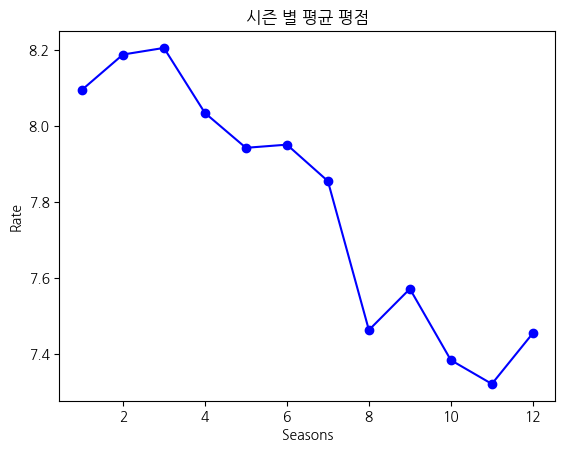

In [125]:
plt.plot(df_rating_avr['시즌'],df_rating_avr['평점'],color='blue',linestyle='-',marker='o')

plt.xlabel('Seasons') #x 라벨
plt.ylabel('Rate') #y 라벨
plt.title("시즌 별 평균 평점") #그래프 이름

plt.show()

In [126]:
driver.close()